<a href="https://colab.research.google.com/github/kellyneves781/regressao1/blob/main/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnavs19/wine-quality-uci-machine-learning-repository")

print("Path to dataset files:", path)


100%|██████████| 97.1k/97.1k [00:00<00:00, 14.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arnavs19/wine-quality-uci-machine-learning-repository/versions/1


In [2]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, 'winequality-red.csv'), sep=';')


df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Todos os tipos de dados são numéricos e não há valores faltantes.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A destribuição dos vinhos de acordo com a qualidade apresenta um desbalanceamento na distribuição de qualidade. A maior parte dos vinhos tem qualidade 5 ou 6, isso pode afetar na predição dos dados, pois o modelo aprenderá bem a reconhecer os vinhos de qualidade 5 e 6, mas não reconhecerá tão bem os de qualidade 3 e 8, por exemplo.

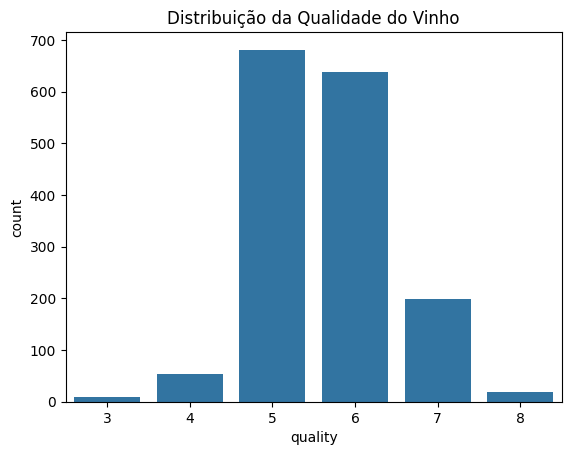

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade do Vinho')
plt.show()

A variável que tem mais correlação com a qualidade é a de teor alcoólico e a que tem menos correlação com qualidade é acidez volátil. Isso pode nos dizer sobre as características que mais influenciam na qualidade do vinho.


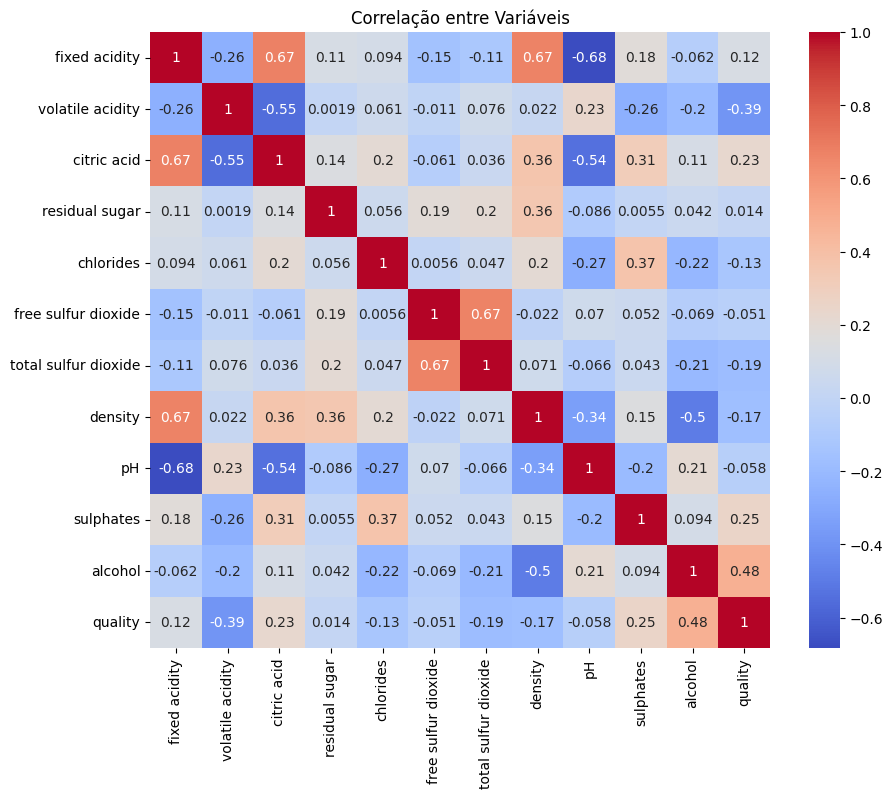

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()


Então para qu possamos prever a qualidade, precisamos separar a variável de qualidade e separar novamente os dados entre treino e teste, para treinar o modelo.

In [7]:
X = df.drop('quality', axis=1)
y = df['quality']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Utilizando o Random Forest, o modelo obteve um MSE de 0.3, que é uma margem de erro rasoável. Além disso, o coeficiente de determinação foi de 0.53, ou seja, ele consegue explicar 54% das avaliações de qualidade pelas variáveis que foram fornecidas. Esses valores não são ruins, mas poderiam melhorar

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.30123812499999997
R²: 0.5390429623873638


Para comparação foi aplicado um modelo de Regressão linear, que resultou em um MSE um pouco mais alto, 0.39, e um coefissiente de determinação menor, de 0.4. Essa mudança era esperada, pois, comparado ao Random Forest, o modelo de Regressão Linear aprende padões lineares e não analiza as interações entre as variáveis.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R²:", r2_score(y_test, y_pred_linear))

Linear Regression:
MSE: 0.3900251439639545
R²: 0.40318034127962254


Por curiosidade, adicionei um novo vinho para prever a qualidade, utilizando um modelo de regressão linear e um modelo com Random forest. Os valores previstos não foram muito diferentes, talvez o modelo linear possa ser utilizado de forma mais simples e prática, mas acredito que melhorando os dados podemos utilizar o Random Forest com um desempenho melhor.

In [16]:
import pandas as pd

colunas = X_train.columns

novo_vinho_df = pd.DataFrame([[
    7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4
]], columns=colunas)

qualidade_prevista = linear_model.predict(novo_vinho_df)
print("Qualidade prevista com Regressão Linear:", qualidade_prevista[0])

qualidade_prevista_rf = model.predict(novo_vinho_df)

print("Qualidade prevista com Random Forest:", qualidade_prevista_rf[0])


Qualidade prevista com Regressão Linear: 5.0483449478604285
Qualidade prevista com Random Forest: 5.02


Conclusão: Para melhora do modelo de previsão, poderia balancerar a quantidade de vinho em relação à qualidade, assim o modelo poderia estar bem treinado em todos os níveis de qualidade. Utilizar os dois datasets, de vinho branco e vermelho, poderia ser uma opção para obter mais dados para previsão de qualidade.